In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.15363773206221795
0.25


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


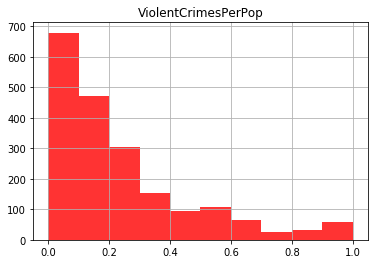

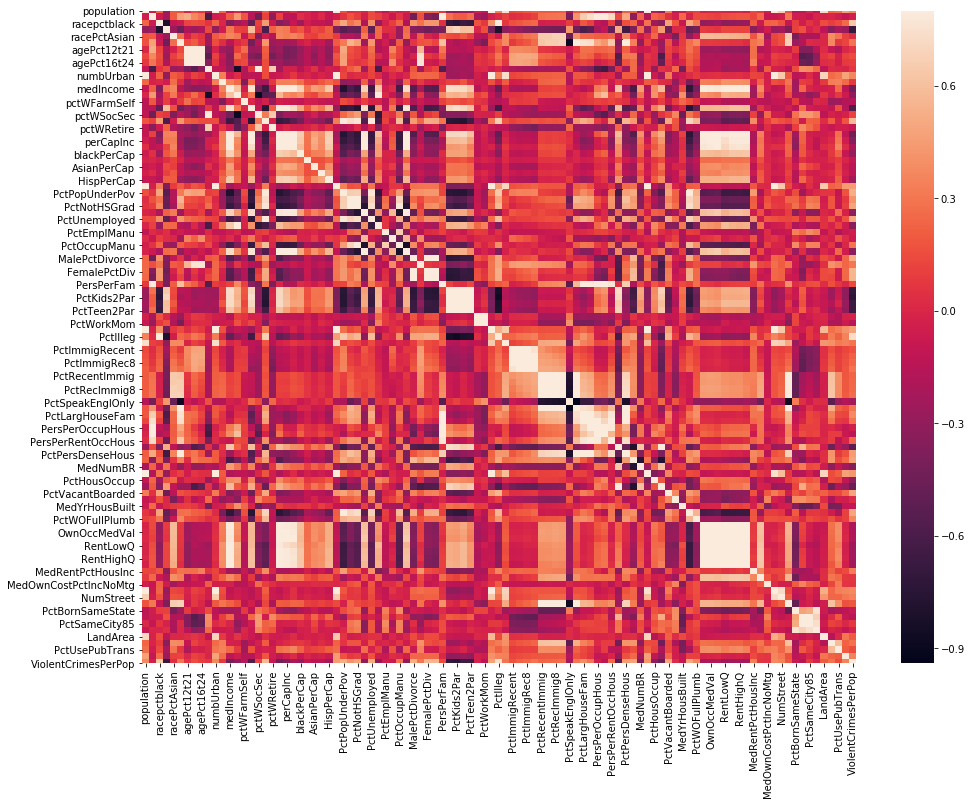

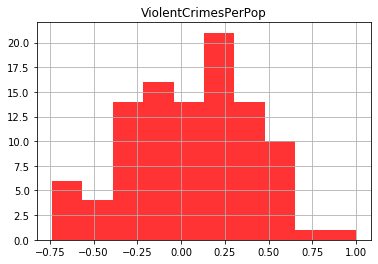

chi2 =  9475.916931283125
p-value =  0.004014065951999552
degree of freedom =  9114
0.22610777628350298
[[ 89   0   5   0]
 [  0 111   0   0]
 [ 10  10  90   0]
 [  0  74  10   0]]
Accuracy0.7268170426065163


Jean.ipynb:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "import matplotlib.pyplot as plt\n",
Jean.ipynb:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "import scipy\n",
Jean.ipynb:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "from sklearn.preprocessing import StandardScaler\n",
Jean.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http:

In [2]:
%run Jean.ipynb
data = data_clean

# Correlations

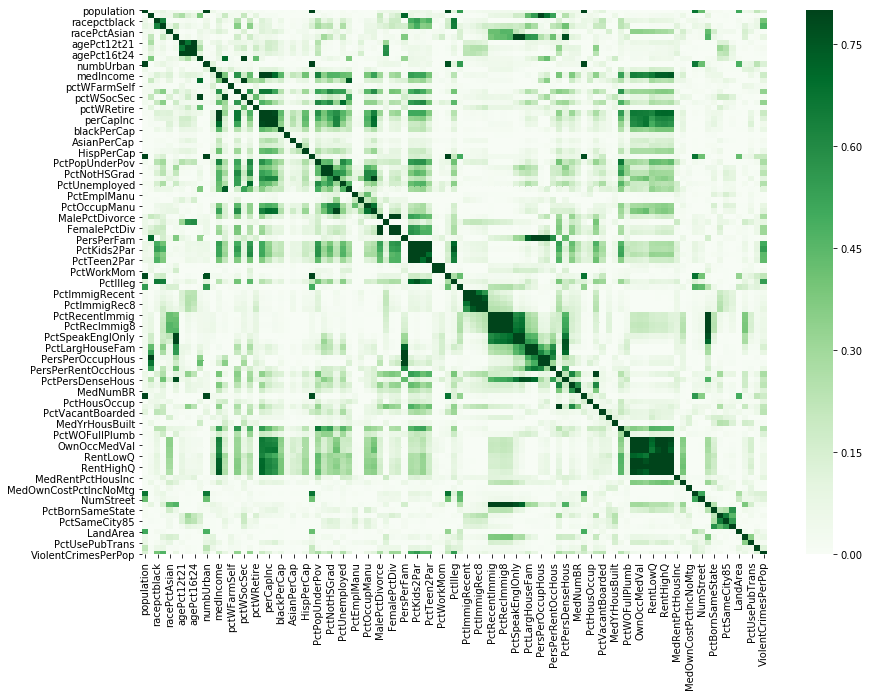

In [3]:
import seaborn as sns

corrmat = (data.corr())**2
fig = plt.figure(figsize = (14, 10))

sns.heatmap(corrmat, vmax = 0.8, cmap='Greens')
plt.show()

In [4]:
corrT = (data.corr())**2
corrT = corrT.sort_values(by=['ViolentCrimesPerPop'], ascending=False)
corrT['ViolentCrimesPerPop'].head(8)

ViolentCrimesPerPop    1.000000
PctKids2Par            0.545457
PctIlleg               0.544440
PctFam2Par             0.499646
racePctWhite           0.468645
PctYoungKids2Par       0.443801
PctTeen2Par            0.437991
racepctblack           0.398818
Name: ViolentCrimesPerPop, dtype: float64

# PCA

In [19]:
# Train and test sets

X = data.iloc[:,0:100].values
y = data.iloc[:,100].values

#Standardize
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


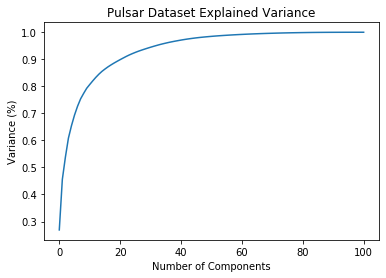

In [6]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [30]:
c = 14
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Le graphe semble indiquer c +-=20 mais c<=14 donc on prend c=14

## RANSAC

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

seed =0

#model = LinearRegression(fit_intercept=True)
model = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_loss',
                         residual_threshold=0.55,
                         random_state=seed)


model.fit(X_train, y_train)

y_pred = model.predict(X_train)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred[y_pred < 0] = 0

K = X_train.shape[1]+1
rms = np.sqrt(sum((y_train-y_pred)**2)/(len(y_train)-K))

R^2: 0.6436
MSE: 0.0192
MAE: 0.0966
rms: 0.1394


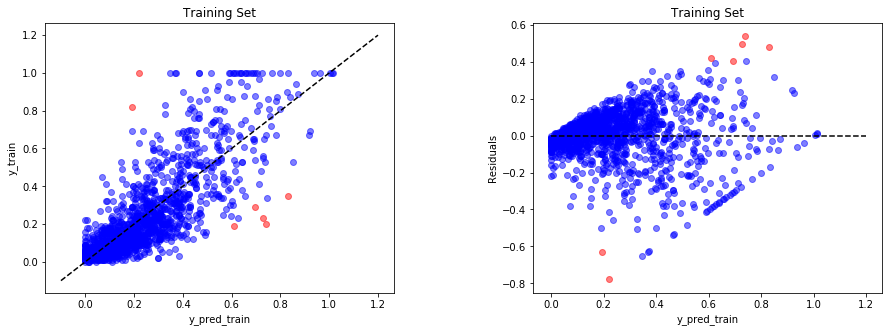

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)

inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred[inlier_mask], y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax1.scatter(y_pred[outlier_mask], y_train[outlier_mask], c = 'red', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Training Set')
ax1.set_xlabel('y_pred_train')
ax1.set_ylabel('y_train')

ax2 = plt.subplot(122)
ax2.scatter(y_pred[inlier_mask], y_pred[inlier_mask] - y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax2.scatter(y_pred[outlier_mask], y_pred[outlier_mask] - y_train[outlier_mask], c = 'red', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Training Set')
ax2.set_xlabel('y_pred_train')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

R^2: 0.6433
MSE: 0.0196
MAE: 0.0962
rms: 0.1417


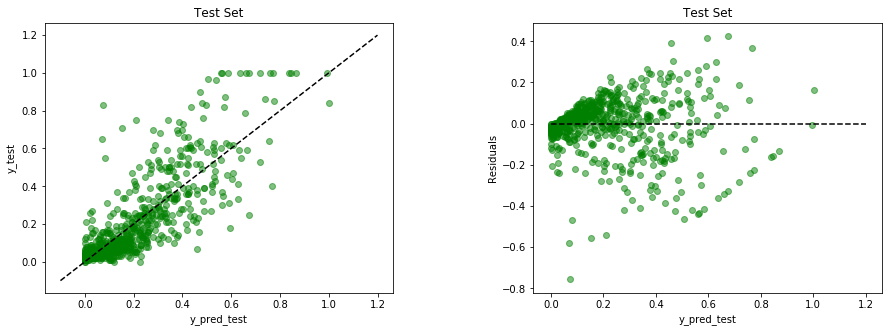

In [10]:
y_pred_test = model.predict(X_test)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred_test[y_pred_test < 0] = 0

nrp = X_test.shape[1]+1
rms = np.sqrt(sum((y_test-y_pred_test)**2)/(len(y_test)-nrp))

print('R^2: %.4f' % r2_score(y_test,y_pred_test))
print('MSE: %.4f' % mean_squared_error(y_test,y_pred_test))
print('MAE: %.4f' % mean_absolute_error(y_test,y_pred_test))
print('rms: %.4f' % rms)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred_test, y_test, c = 'green', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Test Set')
ax1.set_xlabel('y_pred_test')
ax1.set_ylabel('y_test')

ax2 = plt.subplot(122)
ax2.scatter(y_pred_test, y_pred_test - y_test, c = 'green', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Test Set')
ax2.set_xlabel('y_pred_test')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

## Regular Linear Degression

Coefficients: 
 [ 0.02967943  0.01559308  0.01346981  0.01740408 -0.00071878 -0.00433105
 -0.02377615  0.03122069 -0.00062941  0.00158694  0.00201481 -0.02040155
 -0.00139286  0.00826605]
Mean squared error: 0.02
Coefficient of determination: 0.64


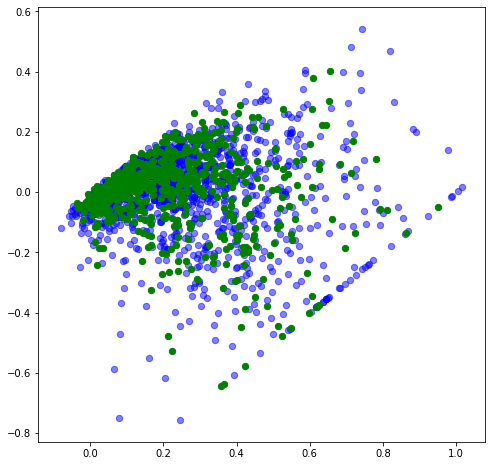

In [24]:
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


##https://stats.stackexchange.com/questions/310766/dealing-with-outliers-with-linear-regression

plt.figure(figsize=(8, 8))
plt.scatter(y_train_predict, y_train_predict - y_train, c='b', s=40, alpha=0.5)
plt.scatter(y_test_predict, y_test_predict - y_test, c = 'g', s=40)

## RANSAC Sickit

In [26]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html

import numpy as np
from matplotlib import pyplot as plt

from sklearn import linear_model, datasets


#n_samples = 1000
#n_outliers = 50


#X, y, coef = datasets.make_regression(n_samples=n_samples, n_features=1,
                                   #   n_informative=1, noise=10,
                                    #  coef=True, random_state=0)

# Add outlier data
#np.random.seed(0)
#X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
#y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor(
)
ransac.fit(X_train, y_train)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=lw,
         label='RANSAC regressor')
plt.legend(loc='lower right')
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()


ValueError: shapes (8,1) and (14,) not aligned: 1 (dim 1) != 14 (dim 0)